In [36]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

circuitos=pd.read_excel('dataset_pfinal_ANS_V2.xlsx')
circuitos.set_index(['Id'],inplace=True)

<Figure size 1440x864 with 0 Axes>

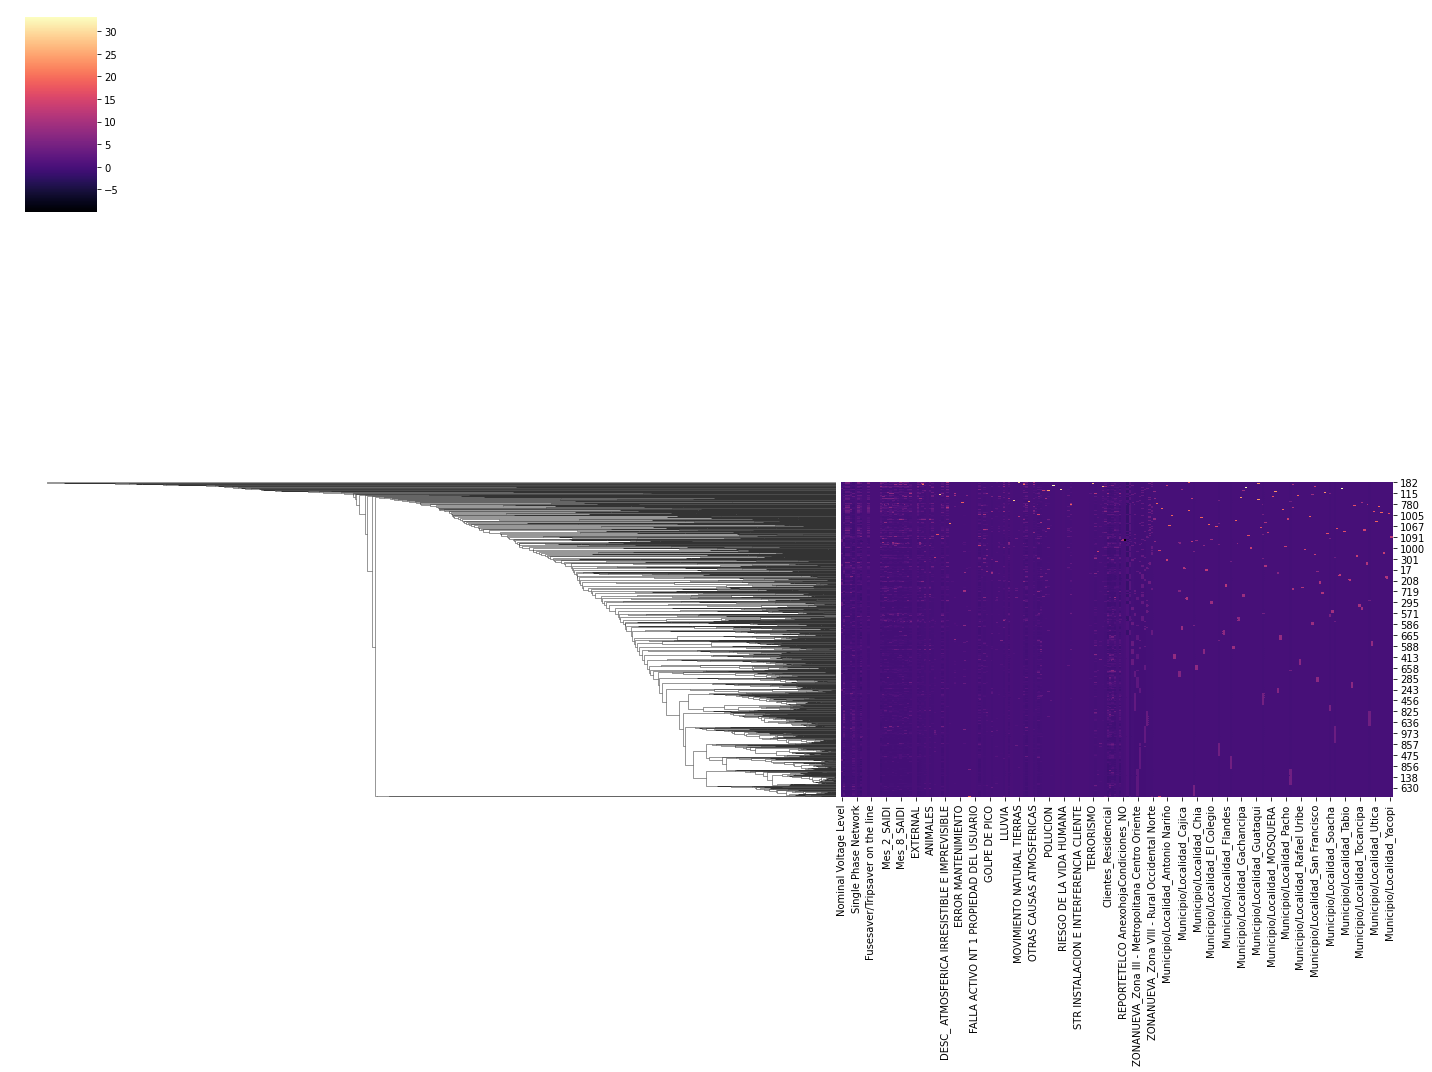

<Figure size 432x288 with 0 Axes>

In [37]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

X= circuitos.loc[:, ~circuitos.columns.isin( ['Substation Name','Transformer','MV Feeder Code','Feeder Name MV'])]
X = pd.get_dummies(X)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_escalado = scaler.fit_transform(X)

escalado_df = pd.DataFrame(X_escalado,columns=X.columns)

g= sns.clustermap(escalado_df,col_cluster=False,figsize=(20,15),dendrogram_ratio=0.6,cmap='magma')
plt.show()
plt.savefig('Cluster Jerarquico_ClusterMap_Filas.png', format='png', dpi=300)




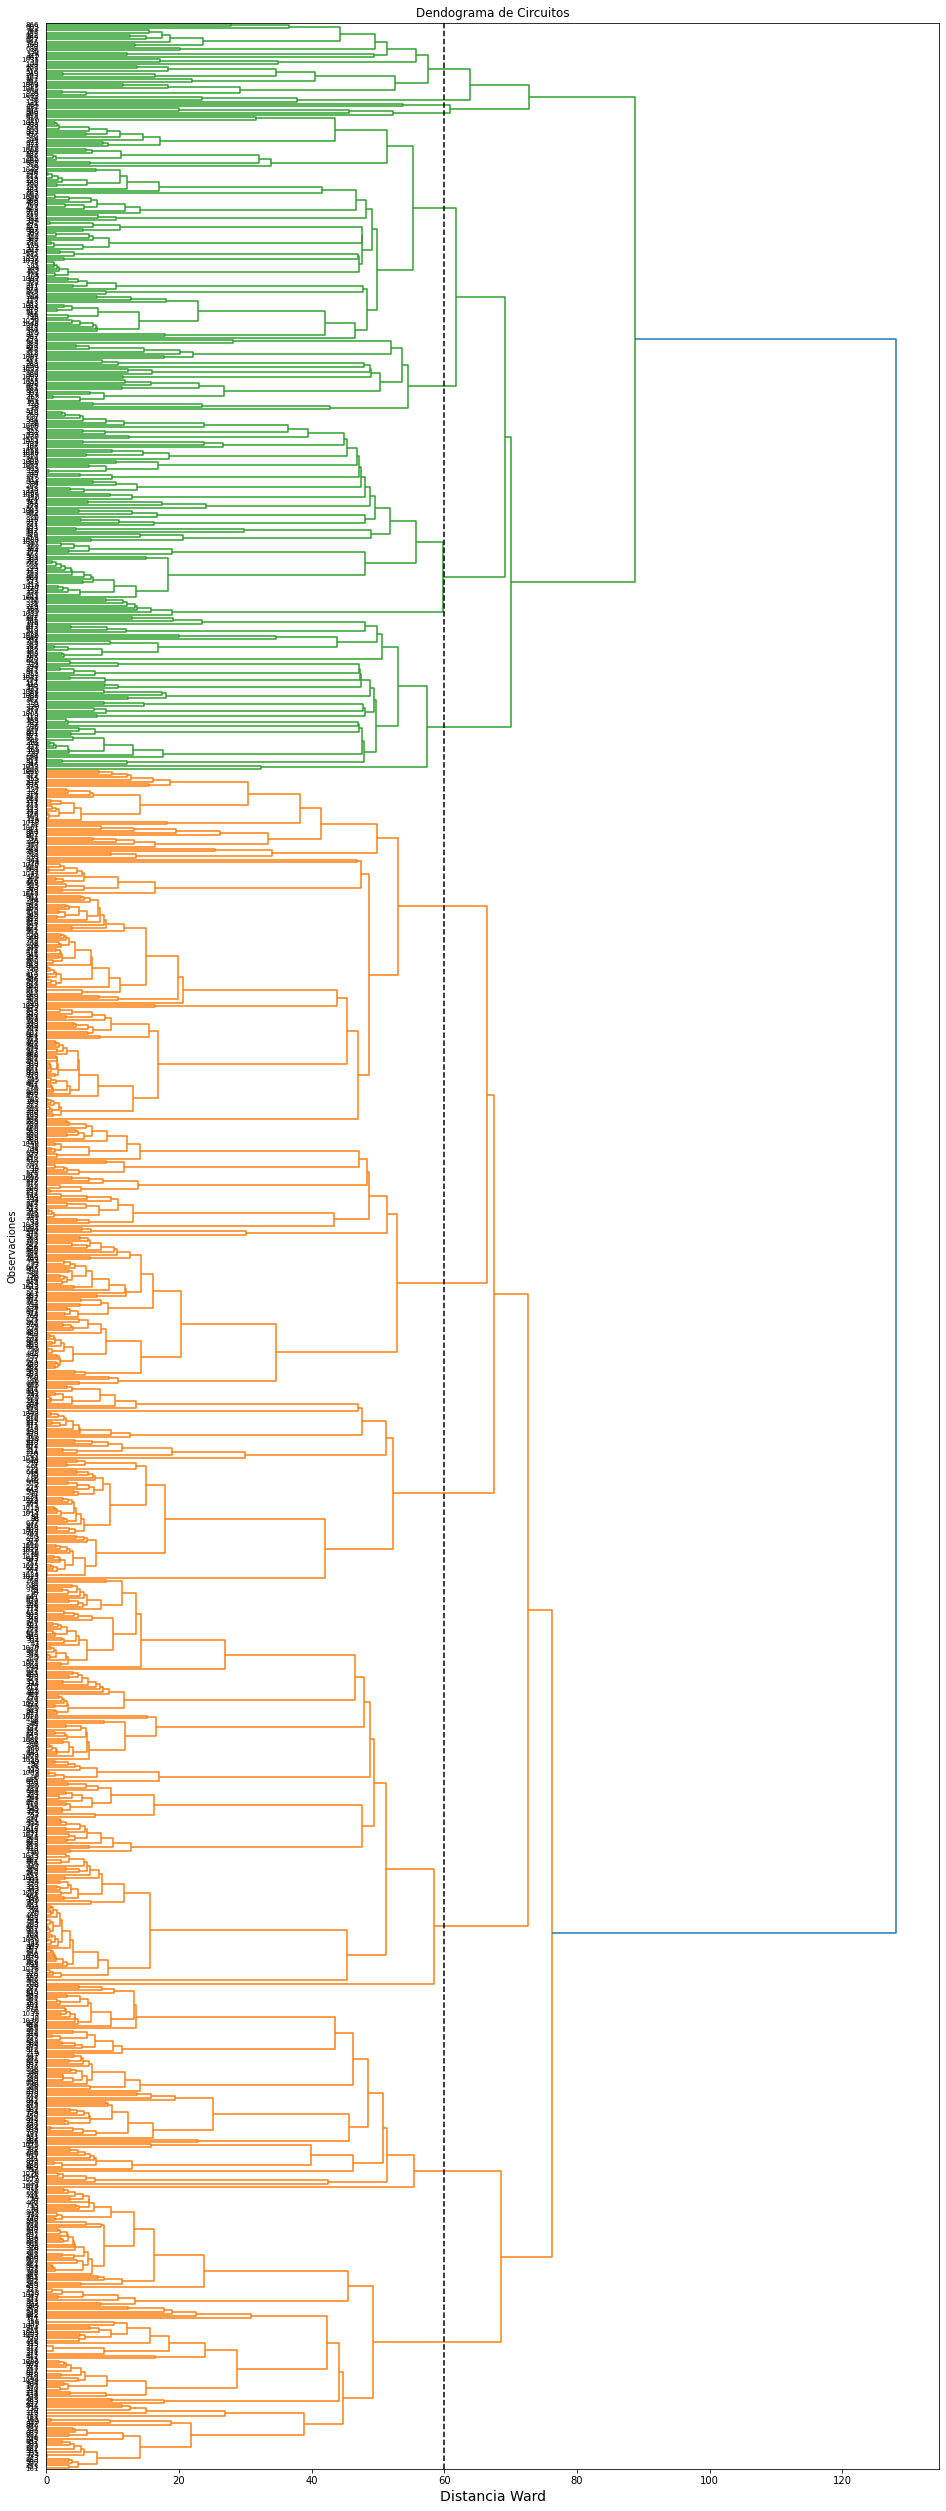

Con una distancia de 60 se retienen 14 clusters


<Figure size 432x288 with 0 Axes>

In [38]:
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

dist = pdist(X_escalado, metric='euclidean')
Z = linkage(dist, method='ward')

# Plot dendograma de circuitos
fig, ax = plt.subplots(figsize=(16, 45))
plt.title("Dendograma de Circuitos")
d = dendrogram(Z, show_leaf_counts=True, leaf_font_size=7, orientation='right',ax=ax)
ax.set_ylabel('Observaciones', fontsize=10)
ax.set_xlabel('Distancia Ward', fontsize=14)
plt.axvline(x=60,  color='black',ls='--')
plt.show()


distancia_corte = 60
clusters= fcluster(Z, t=distancia_corte, criterion='distance')
print(f'Con una distancia de {distancia_corte} se retienen {max(clusters) } clusters')
plt.savefig('Dendograma de circuitos.png', format='png', dpi=300)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

cluster_sk = AgglomerativeClustering(n_clusters=14, affinity='euclidean', linkage='complete')
cluster_sk_labels =cluster_sk.fit_predict(X_escalado)
df_clusterizado=escalado_df.copy()
df_clusterizado['cluster']= cluster_sk_labels

Con estos 14 clusters de corre de nuevo KMEAN 